# Supprt Vector Machine With Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


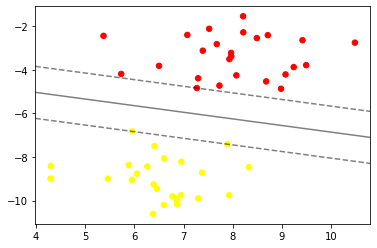

In [3]:
x, y = make_blobs(n_samples=50, centers=2, random_state=6)
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=30,cmap=plt.cm.autumn)
ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX,YY,z,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=100,linewidth=1,facecolors='none')
plt.show()

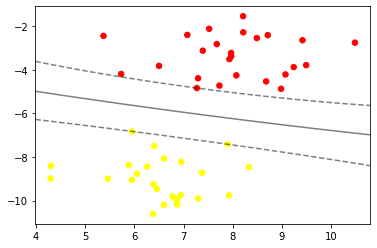

In [8]:
clf_rbf=svm.SVC(kernel='rbf',C=1000)
clf_rbf.fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=30,cmap=plt.cm.autumn)
ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
z = clf_rbf.decision_function(xy).reshape(XX.shape)
ax.contour(XX,YY,z,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
ax.scatter(clf_rbf.support_vectors_[:,0],clf_rbf.support_vectors_[:,1],s=100,linewidth=1,facecolors='none')
plt.show()

In [15]:
from sklearn.datasets import load_wine
def make_meshgrid(x,y,h=0.02):
    x_min, x_max = x.min()-1,x.max()+1
    y_min, y_max = y.min()-1,y.max()+1
    xx, yy=np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    return xx, yy

def plot_coutours(ax, clf, xx, yy, **params):
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    out = ax.contourf(xx,yy,z,**params)
    return out


D:\software\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


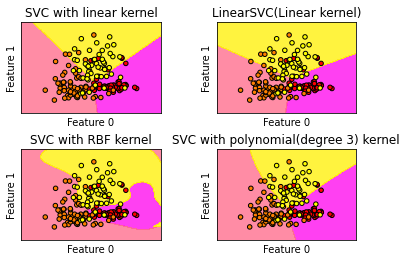

In [16]:
wine = load_wine()
x=wine.data[:,:2]
y=wine.target
c=1.0
models =(svm.SVC(kernel='linear',C=c),svm.LinearSVC(C=c),svm.SVC(kernel='rbf',gamma=0.7,C=c),svm.SVC(kernel='poly',degree=3,C=c))
models = (clf.fit(x,y) for clf in models)
titles=('SVC with linear kernel','LinearSVC(Linear kernel)','SVC with RBF kernel','SVC with polynomial(degree 3) kernel')
fig, sub = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
X0,X1 = x[:,0], x[:,1]
xx, yy = make_meshgrid(X0,X1)
for clf, title, ax in zip(models,titles, sub.flatten()):
    plot_coutours(ax, clf, xx, yy, cmap=plt.cm.spring, alpha=0.8)
    ax.scatter(X0,X1,c=y,cmap=plt.cm.autumn,s=20,edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

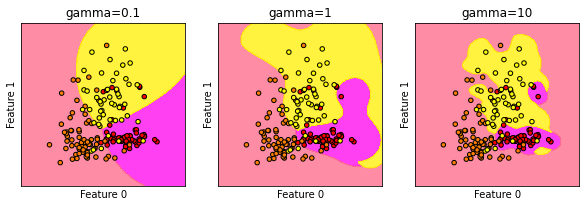

In [19]:
c = 1 # SVM 正则化参数
models = (svm.SVC(kernel='rbf', gamma=0.1, C=c), svm.SVC(kernel='rbf', gamma=1, C=c),svm.SVC(kernel='rbf',gamma=10,C=c))
models = (clf.fit(x,y) for clf in models)
titles = ('gamma=0.1','gamma=1', 'gamma=10')
fig, sub = plt.subplots(1, 3, figsize=(10, 3))
x0, x1 = x[:,0], x[:,1]
xx,yy=make_meshgrid(x0,x1)
for clf,title,ax in zip(models,titles,sub.flatten()):
    plot_coutours(ax, clf, xx, yy, cmap=plt.cm.spring, alpha=0.8)
    ax.scatter(X0,X1,c=y,cmap=plt.cm.autumn,s=20,edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

## SVM 实战

In [23]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())
print(boston['DESCR'])


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [24]:
from sklearn.model_selection import train_test_split
x,y=boston.data, boston.target
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=8)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [25]:
from sklearn.svm import SVR
for kernel in ['linear','rbf']:
    svr=SVR(kernel=kernel)
    svr.fit(x_train, y_train)
    print(svr.score(x_train, y_train), svr.score(x_test, y_test))


0.7088454040060503 0.6964154693072283
0.19202953621697594 0.22231887131613304


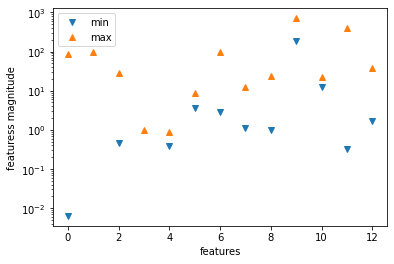

In [26]:
plt.plot(x.min(axis=0),'v',label='min')
plt.plot(x.max(axis=0),'^',label='max')
plt.yscale('log')
plt.legend(loc='best')
plt.xlabel('features')
plt.ylabel('featuress magnitude')
plt.show()

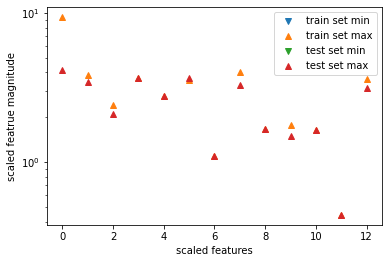

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)
plt.plot(x_train_scaler.min(axis=0),'v',label='train set min')
plt.plot(x_train_scaler.max(axis=0),'^',label='train set max')
plt.plot(x_test_scaler.min(axis=0),'v',label='test set min')
plt.plot(x_test_scaler.max(axis=0),'^',label='test set max')
plt.yscale('log')
plt.legend(loc = 'best')
plt.xlabel('scaled features')
plt.ylabel('scaled featrue magnitude')
plt.show()

In [30]:
for kernel in ['linear','rbf']:
    svr=SVR(kernel=kernel)
    svr.fit(x_train_scaler, y_train)
    print(svr.score(x_train_scaler, y_train), svr.score(x_test_scaler, y_test))

0.7056333150364087 0.6983657869087585
0.6649619040718826 0.6945967225393969


In [31]:
svr = SVR(C=100, gamma=0.1)
svr.fit(x_train_scaler, y_train)
svr.score(x_train_scaler, y_train), svr.score(x_test_scaler, y_test)

(0.9662897941105739, 0.8940385882400999)